In [6]:
import os
import random

import cv2
import numpy as np
import pandas as pd


path = '../dogs-vs-cats/train/'

In [7]:
def image_to_feature_vector(image, size=(32, 32)):
    return cv2.resize(image, size).flatten()

rawImages = []

images_path = [os.path.join(path, item)  for item in  os.listdir(path) ][1:]
# We will be taking a sample of 1000 to improve the algorithm performance
images_sample = random.sample(images_path, 1000)
for (i, im_path) in enumerate(images_sample):
    # The imread function is a function in the cv2 package for reading images
    image = cv2.imread(im_path)
    
    # using the function we defined above, we will ensure that all images are 32*32*3
    # by flattening, we will create one row per image that contains 32*32*2 values
    pixels = image_to_feature_vector(image)
    
    # After processing each image, we append the image to a list and then convert to a numpy array
    rawImages.append(pixels)
    image_array = np.array(rawImages)

In [8]:
def cat_or_dog(x):
    return 0 if "cat." in x else 1

labels = [cat_or_dog(image_path) for image_path in images_sample]

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(image_array)
im_std = scaler.transform(image_array)

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


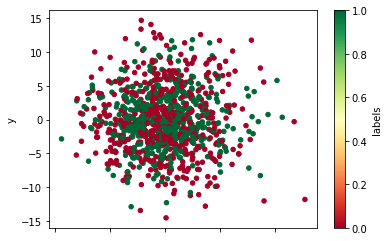

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit(im_std).transform(im_std)

proj_df = pd.DataFrame(proj)
proj_df['labels'] = labels
proj_df.columns = ['x','y','labels']

proj_df.plot.scatter(x='x', y='y', c='labels', cmap='RdYlGn')

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(im_std, labels, 
                                                    test_size=0.25)

### MACHINE LEARNING:

In [13]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train) 

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.464

In [16]:
confusion_matrix(y_test, y_pred)

array([[116,   0],
       [134,   0]])